# Trabalho 1° de Mineração de Dados

## Movies on Netflix, Prime Video, Hulu and Disney+
### A collection of movies found on these streaming platforms


### Alunos

**Nome: Natanael Moreira de lemos - Matricula: 398447**  
**Nome: Ramiro Campos de Castro - Matricula: 400723**

## Perguntas Sobre o dataset

* Média de idade por cada plataforma ou por filme
* Média Imdb por país ou plataforma
* Média do Rotten Tomatoes
* Classificação de idade dos filmes em cada plataforma
* Diretor com mais filmes em cada plataforma
* Linguagem dos filmes
* Filmes com maior duração ou menor duração
* Qual plataforma tem mais séries ou filmes
* Gênero de filme mais popular
* Qual pais tem mais locação de filmes
* Qual plataforma possui mais disponibilidade de filmes 
* Ou Qual plataforma tem mais filmes 





In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
dataS = pd.read_csv("tv_shows.csv")

In [ ]:
data.head(10)

In [ ]:
data['Age']

In [ ]:
## Limpeza na coluna de idade

for i in range(len(data['Age'])):
    aux = data.loc[i,'Age']
    if aux != np.nan or aux != 'all' or aux != '':
        aux = str(aux)
        if '+' in aux:
            data.loc[i,'Age'] = aux.strip().split('+')[0]
            

In [ ]:
data.describe()

In [ ]:
pd.isnull(data).sum()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

# Separando as 4 plataformas

In [10]:
dataPV = data[data['Prime Video'] == 1][['ID','Title','Year','Age','IMDb','Rotten Tomatoes','Directors','Genres','Country','Language','Runtime']]
dataN = data[data['Netflix'] == 1][['ID','Title','Year','Age','IMDb','Rotten Tomatoes','Directors','Genres','Country','Language','Runtime']]
dataH = data[data['Hulu'] == 1][['ID','Title','Year','Age','IMDb','Rotten Tomatoes','Directors','Genres','Country','Language','Runtime']]
dataD = data[data['Disney+'] == 1][['ID','Title','Year','Age','IMDb','Rotten Tomatoes','Directors','Genres','Country','Language','Runtime']]

# Alternativo:
# dataPV = data[data['Prime Video'] == 1].drop(columns=['Unnamed: 0', 'Netflix', 'Hulu', 'Prime Video', 'Disney+','Type' ])
# dataN = data[data['Netflix'] == 1].drop(columns=['Unnamed: 0', 'Netflix', 'Hulu', 'Prime Video', 'Disney+','Type' ])
# dataH = data[data['Hulu'] == 1].drop(columns=['Unnamed: 0', 'Netflix', 'Hulu', 'Prime Video', 'Disney+','Type' ])
# dataD = data[data['Disney+'] == 1].drop(columns=['Unnamed: 0', 'Netflix', 'Hulu', 'Prime Video', 'Disney+','Type' ])

### Porcentagem de Filmes em cada plataforma

In [7]:
labels = 'Netflix','PrimeVideo', 'Hulu','Disney+'
values = {'Netflix':0,'Prime Video':0,'Hulu':0,'Disney+':0}

values['Netflix'] = len(data[data['Netflix'] == 1])
values['Prime Video'] = len(data[data['Prime Video'] == 1])
values['Hulu'] = len(data[data['Hulu'] == 1])
values['Disney+'] = len(data[data['Disney+'] == 1])

sizes = list(values.values())
sizes

[3560, 12354, 903, 564]

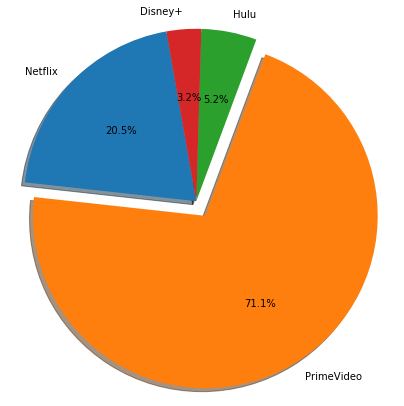

In [6]:
fig, axes = plt.subplots(figsize=(7,7))
explode = (0, 0.1, 0, 0)

axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=100)
axes.axis('equal')
plt.show()

# Ano de Lançamento dos Filmes por Plataforma

# Testes

In [19]:
dataYearPV = data[data['Prime Video'] == 1][['Year']]
dataYearPV = dataYearPV.rename(columns={'Year':"Prime Video"})

dataYearNet = data[data['Netflix'] == 1][['Year']]
dataYearNet = dataYearNet.rename(columns={'Year':"Netflix"})

dataYearHulu = data[data['Hulu'] == 1][['Year']]
dataYearHulu = dataYearHulu.rename(columns={'Year':"Hulu"})

dataYearD = data[data['Disney+'] == 1][['Year']]
dataYearD = dataYearD.rename(columns={'Year':"Disney"})

dataHist = pd.concat([dataYearPV,dataYearNet, dataYearHulu, dataYearD], axis=1)

In [20]:

dataHist

,Prime Video,Netflix,Hulu,Disney
0,NaN,2010.0,NaN,NaN
1,NaN,1999.0,NaN,NaN
2,NaN,2018.0,NaN,NaN
3,NaN,1985.0,NaN,NaN
4,1966.0,1966.0,NaN,NaN
...,...,...,...,...
16739,NaN,NaN,NaN,1980.0
16740,NaN,NaN,NaN,2001.0
16741,NaN,NaN,NaN,2013.0
16742,NaN,NaN,NaN,2017.0


## Histograma com subplot legal

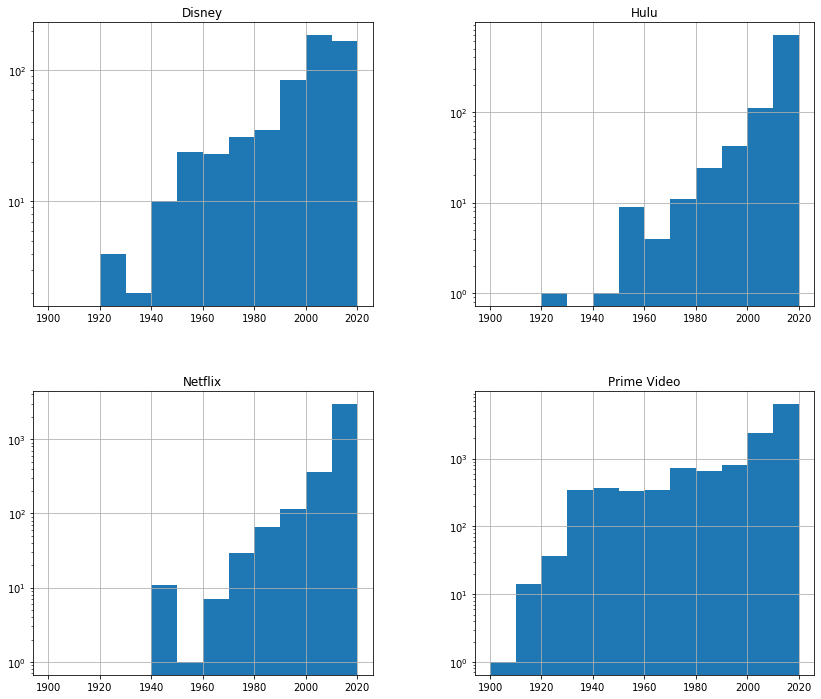

In [22]:
dataHist.hist(bins = 12, range = (1900,2020), figsize=(14, 12), log = True, label = ['ano', 'quantidade'])

# plt.xlabel("X-axis") 
# plt.ylabel("y-axis") 
plt.show()

## Histograma com subplot vertical

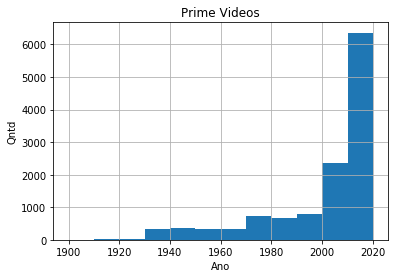

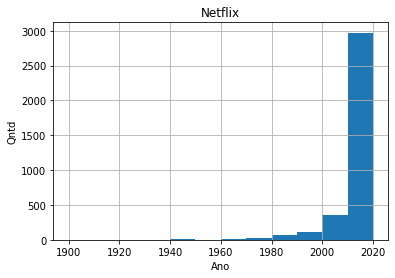

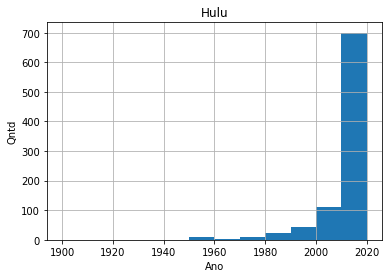

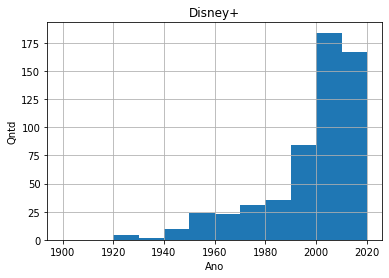

In [23]:
# plt.subplot(2, 2, 1)
dataYearPV.hist(bins = 12, range = (1900,2020))
plt.title('Prime Videos')
plt.xlabel('Ano')
plt.ylabel('Qntd')
plt.show()

# plt.subplot(2, 2, 2)
dataYearNet.hist(bins = 12, range = (1900,2020))
plt.title('Netflix')
plt.xlabel('Ano')
plt.ylabel('Qntd')
plt.show()

# plt.subplot(2, 2, 3)
dataYearHulu.hist(bins = 12, range = (1900,2020))
plt.title('Hulu')
plt.xlabel('Ano')
plt.ylabel('Qntd')
plt.show()

# plt.subplot(2, 2, 4)
dataYearD.hist(bins = 12, range = (1900,2020))
plt.title('Disney+')
plt.xlabel('Ano')
plt.ylabel('Qntd')
plt.show()